In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

# Exploring Categories

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

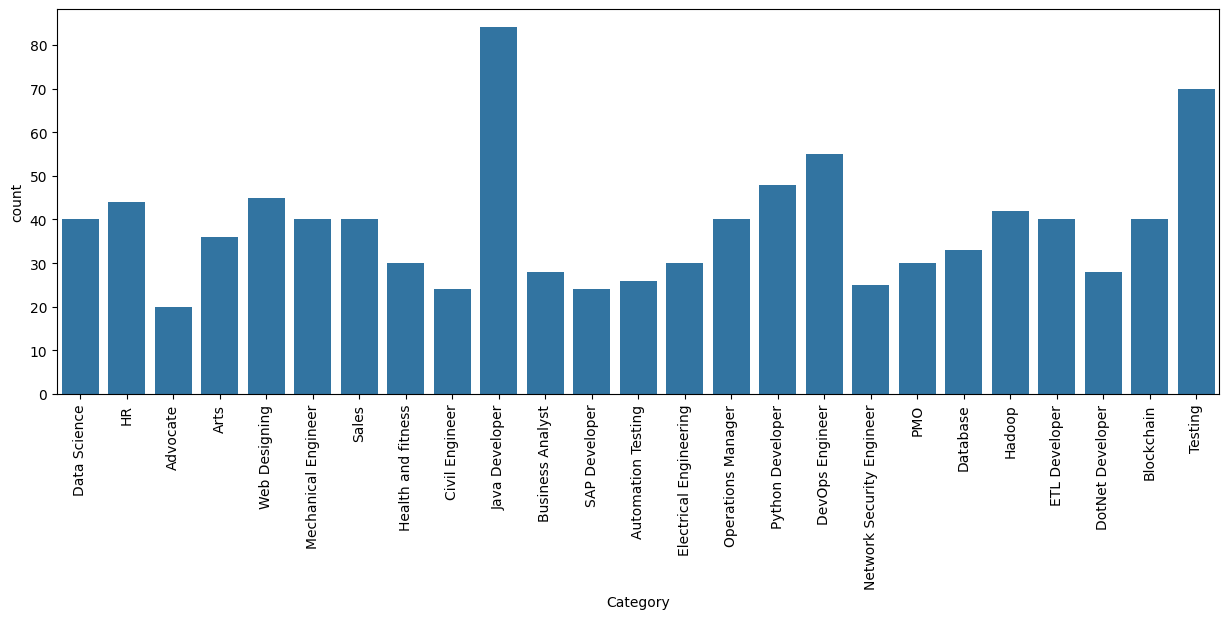

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category', data=df)
plt.xticks(rotation=90)
plt.show()

In [26]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

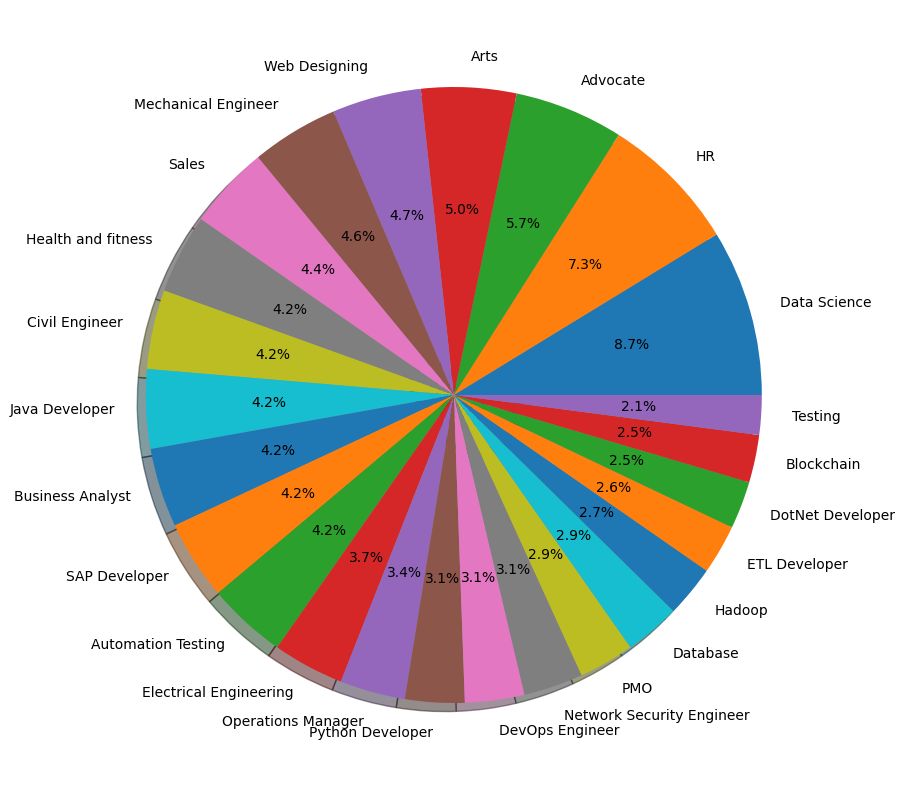

In [34]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()


# Exploring Resume

In [35]:
df['Category'][0]

'Data Science'

In [40]:
df['Resume'][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

# Cleaning Data
 1. URLs,
 2. hashtags,
 3. mentions,
 4. special letters,
 5. punctuations:

In [66]:
import re
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ',txt)
    cleanTxt = re.sub('@\S+',' ',cleanTxt)
    cleanTxt = re.sub('#\S+',' ',cleanTxt)
    cleanTxt = re.sub('RT|cc',' ',cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""),' ',cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)
    
    return cleanTxt

In [67]:
cleanResume("My website is http://helloworld and access it on @domain.com #Cognizant")

'My website is and a ess it on '

In [68]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [69]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# Categorial Values

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [78]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

# Vectorization

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredTxt = tfidf.transform(df['Resume'])

In [87]:
requiredTxt

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164261 stored elements and shape (962, 7351)>

# Splitting

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(requiredTxt, df['Category'], test_size=0.2, random_state=42)

In [91]:
X_train.shape

(769, 7351)

In [92]:
X_test.shape

(193, 7351)

# Model Training and Classification Model Report

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9844559585492227


In [102]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

# Prediction System

In [98]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))

In [101]:
mine = """
Kartikeya Duvvuri 
Atlanta, GA  •   kartikeya.duvvuri@gmail.com  •  404-375-8147  •   linkedin.com/in/kduvvuri  •  github.com/kduvvuri1 • kartikeyaduvvuri.com
PROFESSIONAL SUMMARY
A driven software engineer passionate about AI, machine learning, and full-stack development. Skilled in analyzing data, building scalable systems, and integrating AI for automation and insights. Quick to adapt, eager to learn, and committed to delivering innovative, high-quality software solutions.
EDUCATION
Georgia State University | College of Honors                                        				     Expected Graduation: May 2026        
Bachelor of Science in Computer Science
Award(s): President’s List (2022) | Dean’s List (2023 – Present)	        
SKILLS 
     Languages:           Proficient- Python(3yrs) · JavaScript(2yrs)   Intermediate- SQL(2yrs) · Java(1yrs)   Beginner- C(1yrs) · R(1yr)
     Software Tools:   PowerPoint | Excel | PowerBI | SharePoint | Tableau | MCP | Google Cloud/ADK | AWS | Semantic Kernel | LangChain
Google Data Analytics Professional Certificate             	                                                                                                 January 2025 | Coursera
•	Extracted insights by conducting data cleaning, transformation, and analysis using spreadsheets, SQL, Tableau, and R. 
•	Gained hands-on experience in data analysis, mastering data cleaning, organization, and visualization to extract meaningful insights. 
WORK EXPERIENCE
AI Architecture Associate Intern| Cognizant                                                                                          June 2025 – August 2025| Atlanta, GA  
•	Developed 10+ modular AI agents leveraging Google ADK, Microsoft Semantic Kernel, and LangChain, enabling LLM-driven task automation across finance and operations, cutting manual effort by 35%
•	Implemented Retrieval Augmented Generation (RAG) pipelines using Vertex AI and the Vertex AI RAG Engine to query business policies, accelerating accurate decision-making for 100+ finance and operations use cases
•	Optimized GCP infrastructure for scalable AI deployments, managing 50+ GB of structured and unstructured data, ensuring high availability and low latency for enterprise-scale AI operations
AI & Machine Learning Intern| Fathom Realty – Titan	                                                                    February 2025 – May 2025 | Atlanta, GA  
•	Researching and implementing AI applications in real estate, including chatbots and predictive analytics, leading to a goal of 20% improvement in client engagement and response efficiency
•	Managing 10,000+ data points for AI model training while supporting project planning, documentation, and user testing for improving AI accuracy by 15%
•	Collaborating with cross-functional teams to design AI systems aimed at improving client engagement and response efficiency by 20%
AI Software Developer | FRAMEFLOW | PREPPER  					   December 2024 – May 2025 | Atlanta, GA 
•	Developing an AI-powered dance instruction app using Machine Learning techniques such as pose estimation (MediaPipe, OpenPose) and motion analysis (LSTMs, 3D CNNs) to compare user movements with expert choreography.
•	Developed Prepper.ai, an AI-powered recipe generator to create personalized meal plans.
PROJECTS
br.AI.nstorm | Individual Project (~10 hours) - br.AI.nstorm                                                                                                                                        August 2025
•	Developed a video chat app to create/join meetings, record sessions, and view past/upcoming meetings — 1,200+ users, 5,000+ meetings
•	Enabled video recording and playback, with average engagement of 35 minutes per session
•	Planned integration of AI Large Language Models to automatically generate meeting notes and summaries, aiming to improve productivity and enhance brainstorming sessions, potentially reducing manual notetaking by 90%
Portfolio| Individual Project (~10 hours) - MyPortfolio                                                                     	                                                                               May 2025
•	Developed a fully interactive portfolio website using React.js and Three.js, showcasing skills, projects, and education with dynamic 3D animations
•	Implemented custom components and smooth UI/UX, achieving an average page load time of 1.2s and 95% Lighthouse performance score
•	Attracted over 500 unique visitors in the first week of launch, with 80% engagement on the project showcase section
FrameFlow | Team Project & Open-source (~20 hours) - FrameFlow                                                                     	                            December 2024 – Present
•	Developing an AI-powered dance instruction platform utilizing pose estimation and deep learning, analyzing 10,000+ body movements
•	Building scalable AWS architecture (S3, Lambda, Rekognition) to process 500GB+ of dance motion data for real-time comparison and tracking
•	Implementing automated video analysis workflows to produce side-by-side comparisons, motion capture previews, and similarity scoring
ACTIVITIES
Volunteer & Events Officer | Hindu YUVA GSU                                                                                                                      April 2024 – Present 
Organized and coordinated events for the Hindu Yuva group at Georgia State University, focusing on cultural engagement, community outreach, and educational workshops
Volunteer | St. Vincent DePaul                                                                                                                                                                    April 2023 
Volunteered at St. Vincent DePaul in Georgia, assisting with distributing food to homeless individuals, maintaining food quality and quantity, and supporting the organization’s outreach efforts
"""

In [106]:
import pickle

#Load classifier
clf = pickle.load(open('clf.pkl','rb'))

#Clean up resume
cleaned_up = cleanResume(mine)

#Transform the cleaned up resume
input_features = tfidf.transform([cleaned_up])

#Making the prediction using classifier
prediction_id = clf.predict(input_features)[0]

#Mapping category ID to category name
category_mapping = {
    6: 'Data Science',
    12: 'HR',
    0: 'Advocate',
    1: 'Arts',
    24: 'Web Designing',
    16: 'Mechanical Engineer',
    22: 'Sales',
    14: 'Health and fitness',
    5: 'Civil Engineer',
    15: 'Java Developer',
    4: 'Business Analyst',
    21: 'SAP Developer',
    2: 'Automation Testing',
    11: 'Electrical Engineering',
    18: 'Operations Manager',
    20: 'Python Developer',
    8: 'DevOps Engineer',
    17: 'Network Security Engineer',
    19: 'PMO',
    7: 'Database',
    13: 'Hadoop',
    10: 'ETL Developer',
    9: 'DotNet Developer',
    3: 'Blockchain',
    23: 'Testing'
}

category_name = category_mapping.get(prediction_id, 'Unknown')

print("Predicted category:", category_name)
print(prediction_id)

Predicted category: Data Science
6
